# Latihan-1 Well Log

Latihan ini memberikan gambaran untuk melihat data log, menampilkan data, dan menyiapkan data log elastik untuk analisis selanjutnya. Command program di bawah sangat sederhana untuk pengalaman dan pemakaian dasar bahasa python. Peserta kursus dianjurkan untuk mempelajari banyak library dan contoh yang dapat dipelajari di internet. Tetap semangat !!
<br><br>_citation to this page: "Adi Widyantoro, 2021, Pertamina Seismic QI Course, Latihan-1 Well Logs.ipynb, accessed MM DD, YYYY."_  
<br>
>(update terakhir tanggal 1 Juli 2021 oleh Adi Widyantoro)
<hr>

__Tahap-1__ 
<br> Menggunakan pre-built libraries mendasar seperti numpy, matplotlib dan pandas. Sehingga kita tidak perlu membuat semua fungsi yang kita perlukan dari awal/scratch

><br> _special notes_: brugeslibrary adalah kumpulan pre-defined functions oleh Agile Geoscience bruges: https://github.com/agile-geoscience/bruges
><br> the library's credits go to bruges contributors: Evan Bianco, Ben Bougher, Matt Hall, Alessandro Amato del Monte, Wes Hamlyn, Sean Ross-Ross

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

__Tahap-2__
<br>Menggunakan file lokal atau yang tersimpan online untuk analisis. File path untuk lokal perlu diperhatikan dan diperbaiki jika perlu, menggunakan full path e.g. "C:/Users/Guest/Documents/python/well02logs.csv"
<br>kemudian fungsi selanjutnya melihat header masing-masing kolom, hasilnya dapat dibaca pada baris output dibawahnya
<br><br>_catatan_: library pandas (pd) dapat menggunakan tipe file lain seperti excel dengan command __pd.read_excel('well02logs.xlsx')__ atau __pd.read_table('well02logs.txt')__. Kemudian atribut fungsi reading file tersebut dapat dipelajari pada website pandas

In [2]:
# adi02=pd.read_csv('/content/adi02logs.csv', warn_bad_lines=True, index_col=0) #jika menggunakan google colab
adi02=pd.read_csv('adi02logs.csv', warn_bad_lines=True, index_col=0)
with pd.option_context('expand_frame_repr', False):
    print(adi02.head(5))

         Vp_km/s  Vs_km/s  GammaRay_api  Density_g/cc  Caliper_m  Swt_v/v  Phit_v/v  Vsh_v/v
Depth_m                                                                                     
1580.03     3.13     1.85        101.61          2.56       0.22      1.0      0.12     0.81
1580.18     2.82     1.99        109.44          2.54       0.22      1.0      0.12     0.87
1580.33     2.62     2.16        117.63          2.50       0.22      1.0      0.11     0.93
1580.48     2.48     2.32        120.55          2.46       0.22      1.0      0.11     0.96
1580.63     2.47     2.81        116.01          2.43       0.22      1.0      0.11     0.92


__Tahap-3__
<br>
Melakukan modifikasi header, pengaturan kolom, dan operasi lain, jika memang diperlukan agar mudah dibaca sebagai input analisis berikutnya

In [3]:
adi02.rename(columns={'Depth_m':'Depth', 'Vp_km/s':'Vp', 'Vs_km/s':'Vs','GammaRay_api':'GR',
                      'Density_g/cc':'Rho','Caliper_m':'Cal','Swt_v/v':'Swt','Phit_v/v':'Phit', 
                      'Vsh_v/v':'Vsh'}, inplace=True)
print(adi02.head(5),"\n")
print('Depth min/max: {:.1f}/{:.1f}'.format(adi02.index.min(),adi02.index.max(), sep='\n'))

           Vp    Vs      GR   Rho   Cal  Swt  Phit   Vsh
Depth_m                                                 
1580.03  3.13  1.85  101.61  2.56  0.22  1.0  0.12  0.81
1580.18  2.82  1.99  109.44  2.54  0.22  1.0  0.12  0.87
1580.33  2.62  2.16  117.63  2.50  0.22  1.0  0.11  0.93
1580.48  2.48  2.32  120.55  2.46  0.22  1.0  0.11  0.96
1580.63  2.47  2.81  116.01  2.43  0.22  1.0  0.11  0.92 

Depth min/max: 1580.0/1979.9


In [4]:
atur = ["Cal","GR", "Vp", "Vs", "Rho", "Phit", "Swt", "Vsh"]
adi02=adi02.reindex(columns=atur)
print(adi02.head(5), sep='\n')
avg=adi02[(adi02.index>=1580) & (adi02.index<1980)][['Vp']].mean()
print('Rata-rata',avg.to_string())

          Cal      GR    Vp    Vs   Rho  Phit  Swt   Vsh
Depth_m                                                 
1580.03  0.22  101.61  3.13  1.85  2.56  0.12  1.0  0.81
1580.18  0.22  109.44  2.82  1.99  2.54  0.12  1.0  0.87
1580.33  0.22  117.63  2.62  2.16  2.50  0.11  1.0  0.93
1580.48  0.22  120.55  2.48  2.32  2.46  0.11  1.0  0.96
1580.63  0.22  116.01  2.47  2.81  2.43  0.11  1.0  0.92
Rata-rata Vp    3.411474


__Tahap-4__
<br>
Menampilkan missing data, null, negative values dalam tabel

In [5]:
shownull=adi02.isnull().any()
print(shownull.to_string())

Cal     False
GR      False
Vp      False
Vs      False
Rho     False
Phit    False
Swt     False
Vsh     False


In [6]:
nullvp = pd.DataFrame(adi02['Vp'])
print(nullvp)
print("Total negative values count:", nullvp.agg(lambda x: sum(x < 0)).sum())

           Vp
Depth_m      
1580.03  3.13
1580.18  2.82
1580.33  2.62
1580.48  2.48
1580.63  2.47
...       ...
1979.31  3.92
1979.47  3.96
1979.62  3.98
1979.77  4.01
1979.92  4.07

[2625 rows x 1 columns]
Total negative values count: 0


In [7]:
nullvs=adi02.Vs.values.flatten()
print(nullvs)
print("Total negative count:",
      sum(n < 0 for n in nullvs))

[1.85 1.99 2.16 ... 2.2  2.22 2.25]
Total negative count: 0


In [8]:
nullrho = pd.DataFrame(adi02['Rho'])
print("Total Null values count: ",
      nullrho.isnull().sum().sum())
print("Total negative count:",
      sum(n < 0 for n in nullvs))

Total Null values count:  0
Total negative count: 0


__Tahap-5__
<br>
Menampilkan data statistik univariate dari masing-masing log yang akan dianalisis. Perlu diperhatikan bahkan dicatat nilai minimum, maksimum, rata-rata yang akan terpakai saat melakukan crossplotting atau pembuatan cut-off. Command di bawah menampilkan representasi statistik univariate dan persentil 10%, 50%, dan 90% distribusi data

In [9]:
adi02[['Cal','Vp','Vs','Rho', 'GR', 'Phit', 'Swt', 'Vsh']].describe([0.1,0.9])

,Cal,Vp,Vs,Rho,GR,Phit,Swt,Vsh
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,0.215090,3.411474,1.867417,2.426952,80.541150,0.125387,0.967368,0.610770
std,0.010271,0.437306,0.340301,0.235801,28.400188,0.036083,0.088379,0.257232
min,0.210000,2.190000,0.870000,1.230000,20.540000,0.070000,0.580000,0.020000
10%,0.210000,2.814000,1.420000,2.200000,38.268000,0.090000,0.850000,0.220000
50%,0.210000,3.470000,1.920000,2.510000,88.980000,0.110000,1.000000,0.700000
90%,0.220000,3.930000,2.260000,2.600000,112.422000,0.180000,1.000000,0.890000
max,0.390000,5.240000,3.280000,2.730000,174.920000,0.270000,1.000000,1.000000


__Tahap-6__
<br>
Menampilkan profil log track data yang esensial untuk analisis berikutnya

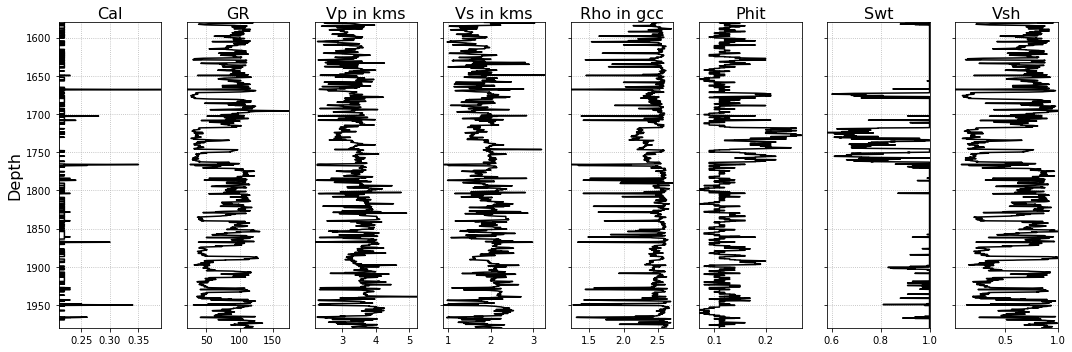

In [10]:
exec(open('f01plotlogs.py').read())
#plt.savefig('01welllog_1.png', dpi=200)

<h1><center>-Akhir Program Latihan-1-<center></h1>